In [2]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from callback.data_processing import DataProcessing

import itertools

# 正規化
from sklearn.preprocessing import MinMaxScaler
import math

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Processing

In [3]:
def mk_dataframe(path):
    df = pd.read_table(path, sep=" ", header=None)
    df = df.drop(columns=0, axis=1)
    df = df.drop(columns=df.shape[1], axis=1)
    return df

df = mk_dataframe("230728/pos-3.dat")

In [4]:
df_ = df.values

In [5]:
df_.shape

(36000, 60)

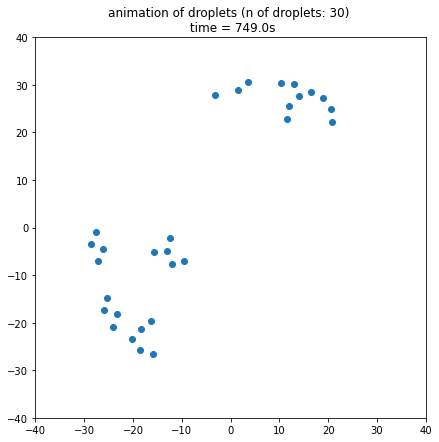

In [5]:
fig = plt.figure(figsize=(7,7))

start_time = 0
target = 17
def plot(time):
    plt.cla()                   # 前のグラフを削除
    
    time *= 10
    plt.scatter(df_[time+start_time,::2], df_[time+start_time,1::2])
    # plt.scatter(df_[time+start_time,target*2], df_[time+start_time, target*2 + 1], marker="x", s=100, label = "target")
    plt.title("animation of droplets (n of droplets: 30) \n time = {:.1f}s".format((time+start_time) * 0.1))
    # plt.legend()
    plt.xlim(-40,40)
    plt.ylim(-40,40)

    return fig

ani = animation.FuncAnimation(fig, plot, frames=750, interval=1000)

from IPython.display import HTML
HTML(ani.to_html5_video())

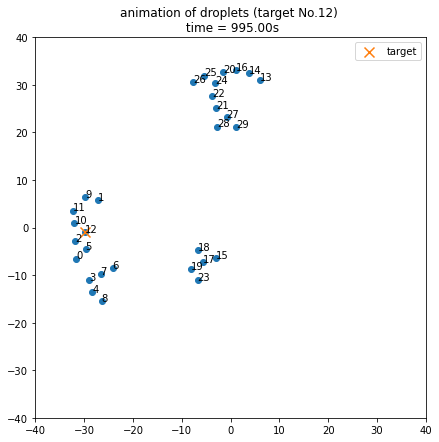

In [337]:


start_time = 0
target = 12
fig = plt.figure(figsize=(7,7))

def plot(time):
    plt.cla()                   # 前のグラフを削除
    
    time *= 50
    plt.scatter(df_[time+start_time,::2], df_[time+start_time,1::2])
    plt.scatter(df_[time+start_time,target*2], df_[time+start_time, target*2 + 1], marker="x", s=100, label = "target")
    plt.title("animation of droplets (target No.{}) \n time = {:.2f}s".format(target, (time+start_time) * 0.1))
    plt.legend()
    plt.xlim(-40,40)
    plt.ylim(-40,40)
    
    for i in range(30):
        plt.text(df_[time + start_time,i*2], df_[time + start_time,i*2+1], i)

    return fig

ani = animation.FuncAnimation(fig, plot, frames=200, interval=1000)

from IPython.display import HTML
HTML(ani.to_html5_video())

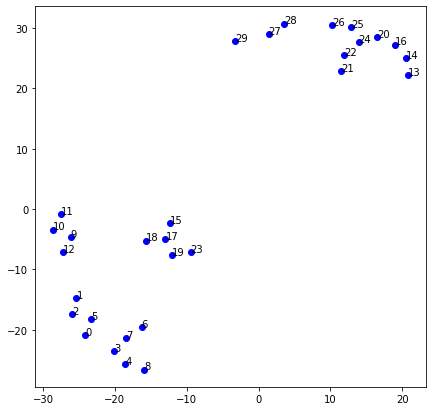

In [70]:
plt.figure(figsize=(7,7))
for i in range(30):
    plt.scatter(df_[7490,i*2], df_[7490,i*2+1], color="b")
    plt.text(df_[7490,i*2], df_[7490,i*2+1], i)

In [6]:
def delete_label_stop(data, labels):
    """ ラベルがstopを意味するデータを削除する
    delete_index: 削除するデータのインデックス
    """
    delete_index = np.where(labels == 8)[0]
    data = np.delete(data, [i for i in delete_index], axis=0)
    labels = np.delete(labels, [i for i in delete_index], axis=0)
    return labels, data


def create_data_instance(data, n_nearest_neighbors, target_list, split_angle, time_range)->dict:
    data_dict = {}
    for target in target_list:
        data_instace = DataProcessing(data, n_nearest_neighbors=n_nearest_neighbors, target_no=target, split_angle=split_angle, time_range=time_range)
        labels, data_d_and_angle = data_instace()
        
        # delete labels stop
        labels, data_d_and_angle = delete_label_stop(data_d_and_angle, labels)
        
        data_dict[target] = labels, data_d_and_angle
        
    return data_dict

In [164]:
time_range = 5

df_to_use = df_[:10000:int(time_range*10)]

In [165]:
df_to_use.shape

(200, 60)

In [166]:
target_list = [0, 1, 3, 5, 9, 10, 11, 12, 14, 15, 17, 18, 19, 23, 27,28,29]
# target_list = [i for i in range(30)]
n_nearest_neighbors = 5
split_angle = 45
data_dict = create_data_instance(df_to_use, n_nearest_neighbors, target_list, split_angle, time_range)

In [167]:
data_dict[1]

(array([7., 7., 7., 7., 0., 0., 4., 3., 4., 4., 5., 4., 4., 5., 5., 4., 5.,
        4., 5., 5., 4., 4., 4., 4., 3., 4., 3., 3., 3., 4., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 3., 3., 2.,
        3., 3., 3., 3., 2., 2., 2., 2., 2., 3., 2., 2., 1., 2., 3., 2., 2.,
        2., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 2.,
        2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 0., 0., 1., 2., 0., 0., 1., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 1., 1., 1., 1., 2., 2.,
        2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.]),
 array([[-2.72769846e+00, -3.19526681e-01,  9.62098379e-02, ...,
         -7.41656784e+00, -7.51695411e-02, -7

### Labels and their size

In [168]:
for i in data_dict:
    print("========= label no.{} =========".format(i))
    print(np.unique(data_dict[i][0], return_counts=True))

========= label no.0 =========
(array([0., 1., 2., 3., 4., 5.]), array([  6,   1,  58, 103,  20,  10]))
========= label no.1 =========
(array([0., 1., 2., 3., 4., 5., 7.]), array([ 6, 25, 60, 80, 17,  6,  4]))
========= label no.3 =========
(array([2., 3., 4., 5.]), array([50, 97, 48,  3]))
========= label no.5 =========
(array([0., 1., 2., 3., 4., 5., 7.]), array([  7,   4,  61, 101,  17,   7,   1]))
========= label no.9 =========
(array([0., 1., 2., 3., 4., 5., 6., 7.]), array([ 2, 27, 65, 51, 24, 22,  6,  1]))
========= label no.10 =========
(array([0., 1., 2., 3., 4., 5., 6., 7.]), array([ 1, 10, 70, 68, 19, 21,  7,  2]))
========= label no.11 =========
(array([0., 1., 2., 3., 4., 5., 6.]), array([ 1, 14, 64, 67, 35, 14,  3]))
========= label no.12 =========
(array([0., 1., 2., 3., 4., 5., 6., 7.]), array([15, 21, 62, 51, 21, 16,  8,  4]))
========= label no.14 =========
(array([1., 2., 3., 4.]), array([ 40, 102,  52,   4]))
========= label no.15 =========
(array([0., 1., 2., 3., 4

### Concatenate data

In [169]:
labels_list = [data[0] for data in data_dict.values()]
data_list = [data[1] for data in data_dict.values()]


# Concatenate the arrays along the rows (axis=0)
data_d_and_angle = np.concatenate(data_list, axis=0)
labels = np.concatenate(labels_list, axis=0)

In [170]:
data_d_and_angle[0]

array([ 1.49794378e+00, -2.30707776e+00,  7.02575113e-02,  5.53685374e-02,
        4.02442587e+00, -1.16826416e+00,  9.62098379e-02, -5.85311955e-03,
        6.75212434e+00, -8.48737482e-01,  9.23024888e-02, -4.47541480e-02,
       -7.22811687e+00, -2.37373980e+00, -3.46009706e-02,  5.05162708e-02,
        5.75779636e+00, -8.33760514e+00, -7.59064640e-02, -5.35024620e-02])

#### labels and its number

In [171]:
np.unique(labels, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 array([264, 307, 657, 821, 300, 255, 486, 264]))

### Normalize data

In [172]:
"""# 距離を正規化
data_d_and_angle[:, ::4] /= 6
# 角度による標準化
data_d_and_angle[:, 1::4] /= 360"""

# 距離を正規化
# data_d_and_angle[:, ::4] /= 10
# data_d_and_angle[:, 1::4] /= 10

norm_boolean = True

from sklearn.preprocessing import MinMaxScaler

if norm_boolean:
    scaler = MinMaxScaler()
    data_d_and_angle = scaler.fit_transform(data_d_and_angle)

In [173]:
data_d_and_angle[0]

array([0.88610964, 0.16653498, 0.80889946, 0.53422622, 0.64487179,
       0.25005309, 0.56840886, 0.41215416, 0.66307576, 0.19575041,
       0.56501345, 0.23730473, 0.44293521, 0.18439237, 0.45473667,
       0.32463736, 0.67731796, 0.10633754, 0.17419265, 0.2226163 ])

### Create Dataset and DataLoader

In [183]:
X = torch.tensor(data_d_and_angle, dtype=torch.float32)
target = torch.tensor(labels, dtype=torch.int64) 

# 目的変数と入力変数をまとめてdatasetに変換
dataset = torch.utils.data.TensorDataset(X,target)

# 各データセットのサンプル数を決定
# train : val : test = 80% : 10% : 10%
n_train = int(len(dataset) * 0.8)
n_val = int((len(dataset) - n_train) * 0.5)
n_test = len(dataset) - n_train - n_val

print("train size: {}, val size: {}, test size: {}".format(n_train, n_val, n_test))

# データセットの分割
torch.manual_seed(0) #乱数を与えて固定
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val,n_test])

train size: 2683, val size: 335, test size: 336


In [184]:
#バッチサイズ
batch_size = 50

# 乱数のシードを固定して再現性を確保
torch.manual_seed(0)

# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

# 辞書型変数にまとめる(trainとvalをまとめて出す)
dataloaders_dict = {"train": train_loader, "val": val_loader}

In [185]:
for (x,t) in train_loader:
    print(x)
    break

tensor([[0.8551, 0.1188, 0.6752, 0.4604, 0.6332, 0.1657, 0.4568, 0.4351, 0.4641,
         0.2185, 0.4521, 0.3161, 0.4820, 0.1727, 0.4529, 0.2300, 0.6754, 0.2785,
         0.2286, 0.3212],
        [0.7821, 0.1198, 0.8560, 0.4321, 0.5892, 0.1189, 0.5852, 0.3683, 0.4609,
         0.0183, 0.4823, 0.2919, 0.4899, 0.0066, 0.4729, 0.2168, 0.4934, 0.0249,
         0.2100, 0.3381],
        [0.6864, 0.5772, 0.8815, 0.5622, 0.4709, 0.4990, 0.6273, 0.5309, 0.4704,
         0.1166, 0.5180, 0.3440, 0.5065, 0.0924, 0.4819, 0.2174, 0.5209, 0.0977,
         0.1966, 0.3039],
        [0.7501, 0.1649, 0.6959, 0.4671, 0.4728, 0.4135, 0.4820, 0.4457, 0.5326,
         0.3362, 0.5003, 0.3187, 0.3582, 0.3131, 0.5035, 0.2848, 0.5135, 0.5678,
         0.2293, 0.3778],
        [0.6870, 0.5206, 0.6515, 0.4541, 0.5787, 0.4594, 0.4356, 0.4718, 0.6178,
         0.2605, 0.4387, 0.4114, 0.4937, 0.0624, 0.5281, 0.1454, 0.5966, 0.1033,
         0.3510, 0.3641],
        [0.8616, 0.9542, 0.7277, 0.3858, 0.6029, 0.2537, 0.4

## Model Define

In [186]:
class Net(nn.Module):

    # 使用するオブジェクトを定義
    def __init__(self, n_nearest_neighbors):
        super(Net, self).__init__()
        self.input_dim = n_nearest_neighbors * 4
        
        self.layers1 = nn.Sequential(
            nn.Linear(self.input_dim, 20),
            nn.ReLU(),
            nn.Linear(20, 40),
            nn.ReLU()
        )
        self.layers2 = nn.Sequential(
            nn.Dropout(p=0.3, inplace=False),
            nn.BatchNorm1d(40),
            nn.Linear(40, 8)
        )

    # 順伝播
    def forward(self, x):
        
        x = self.layers1(x)
        out = self.layers2(x)
        return out    

In [187]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Clear the gradients
        
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_loss /= len(train_loader)
    accuracy = 100.0 * correct / total
    
    return train_loss, accuracy


def evaluate(model, test_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    test_loss /= len(test_loader)
    accuracy = 100.0 * correct / total
    
    return test_loss, accuracy


## Train

In [188]:
# インスタンス化
net = Net(n_nearest_neighbors=n_nearest_neighbors)

# 損失関数の設定
criterion = nn.CrossEntropyLoss()

# 最適化手法の選択
lr = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

epochs = 1000

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [189]:
loss = {
    "train": [],
    "val": [],
    "val acc": []
}

for i in range(epochs):
    train_loss, train_acc = train(net, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(net, val_loader, criterion, device)
    
    loss["train"].append(train_loss)
    loss["val"].append(val_loss)
    loss["val acc"].append(val_acc)
    
    if i == 0 or (i+1) % 50 == 0:
        print("epoch: {:>3}, train_loss: {:.4f}, train_acc: {:.2f}%, val_loss: {:.4f}, val_acc: {:.2f}%".format(
            i+1, train_loss, train_acc, val_loss, val_acc))

epoch:   1, train_loss: 2.1250, train_acc: 13.42%, val_loss: 2.0808, val_acc: 18.81%
epoch:  50, train_loss: 1.8247, train_acc: 33.36%, val_loss: 1.7729, val_acc: 41.49%
epoch: 100, train_loss: 1.6038, train_acc: 40.55%, val_loss: 1.5181, val_acc: 48.06%
epoch: 150, train_loss: 1.4523, train_acc: 46.93%, val_loss: 1.3677, val_acc: 50.15%
epoch: 200, train_loss: 1.3236, train_acc: 50.13%, val_loss: 1.2279, val_acc: 58.21%
epoch: 250, train_loss: 1.2390, train_acc: 54.01%, val_loss: 1.1492, val_acc: 61.79%
epoch: 300, train_loss: 1.1807, train_acc: 54.71%, val_loss: 1.0659, val_acc: 61.49%
epoch: 350, train_loss: 1.1350, train_acc: 56.91%, val_loss: 1.0674, val_acc: 63.58%
epoch: 400, train_loss: 1.1020, train_acc: 58.22%, val_loss: 1.0558, val_acc: 60.30%
epoch: 450, train_loss: 1.0798, train_acc: 58.29%, val_loss: 0.9900, val_acc: 63.58%
epoch: 500, train_loss: 1.0559, train_acc: 58.74%, val_loss: 0.9842, val_acc: 65.37%
epoch: 550, train_loss: 1.0395, train_acc: 60.16%, val_loss: 0.97

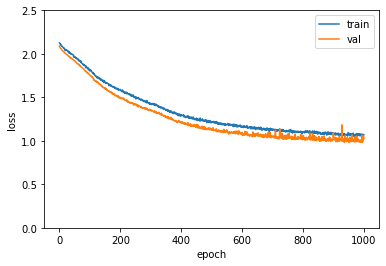

In [181]:
plt.plot(range(epochs), loss["train"], label="train")
plt.plot(range(epochs), loss["val"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()

### Save log

In [182]:
import csv
# =====log=====
save_output = [{
    "target list": target_list,
    "n nearest neighbors": n_nearest_neighbors,
    "time range": time_range,
    "train size": n_train,
    "batch size": batch_size,
    "norm": norm_boolean,
    "epoch": epochs,
    "learning rate": lr,
    "min val loss": min(loss["val"]),
    "max val acc": max(loss["val acc"]),
}]

with open('compare_hyperparams.csv','a') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = list(save_output[0]))
    # writer.writeheader()
    writer.writerows(save_output)
